# Preliminaries

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I2 = np.eye(2, dtype = complex)
tau_x, tau_y, tau_z, tau_0 = sigma_x, sigma_y, sigma_z, I2

# Parameters
g1, g2 = 0.5, -0.5

Nk = 201

kzs = np.linspace(-np.pi,np.pi, Nk)
kys = np.linspace(-np.pi,np.pi, Nk)
YY, ZZ = np.meshgrid (kys, kzs)

L = 30 #OBC in x-direction

# Fermi arcs for Parent 1

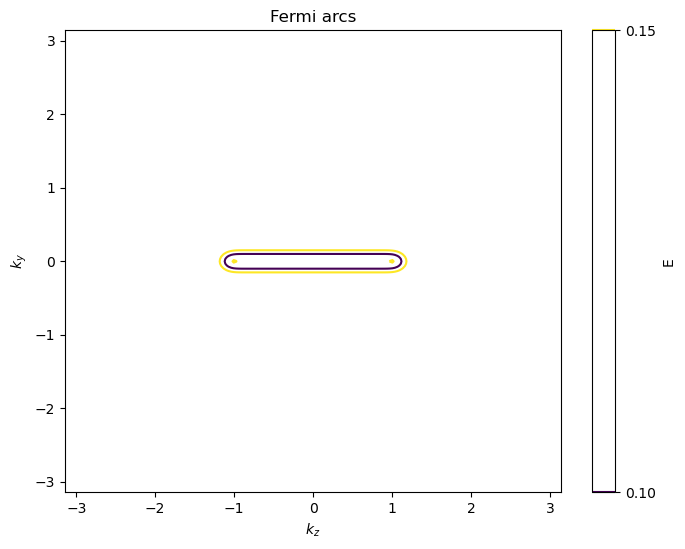

In [7]:

P1_eigvals_oc_vs_kz = []
# Hamiltonian
for kz in kzs:
    for ky in kys:
        H_P10 = np.sin(ky)*tau_y+(2+g1-np.cos(ky)-np.cos(kz))*tau_z
        V_P10 = (-1j/2)*tau_x+(1/2)*tau_z
      
        HP1_open = np.zeros((2*L, 2*L), dtype=complex)
        for i in range(L):
            HP1_open[2*i:2*i+2, 2*i:2*i+2] = H_P10
            if i < L - 1:
                HP1_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V_P10
                HP1_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V_P10.conj().T
        
        P1_eigenvals_oc = np.linalg.eigvalsh(HP1_open)      
        P1_eigvals_oc_vs_kz.append(P1_eigenvals_oc.real)

arr = np.array(P1_eigvals_oc_vs_kz)
arr_reshaped = arr.reshape(len(kzs), len(kys), 2*L)

#Plot
plt.figure(figsize=(8,6))
for band in range (2*L):
    plt.contour(ZZ, YY, arr_reshaped[:, :, band], [0.1,0.15] )
plt.colorbar(label=f'E' )
plt.xlabel('$k_z$')
plt.ylabel('$k_y$')
plt.title('Fermi arcs')
plt.show()

# Fermi arcs for Parent 2

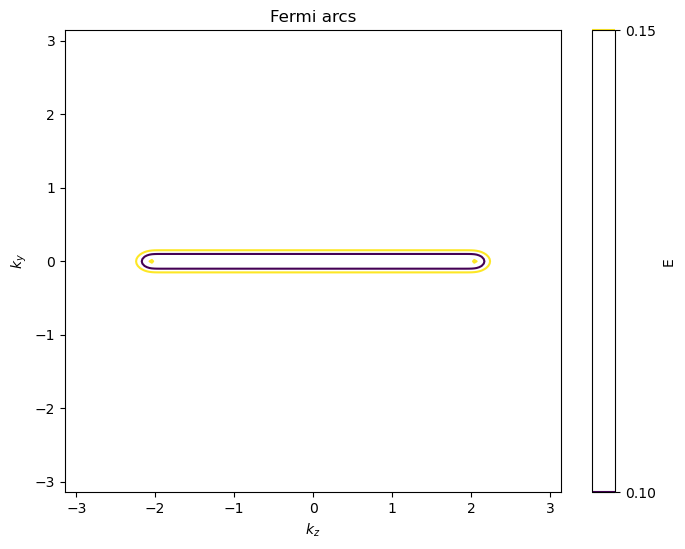

In [8]:
P2_eigvals_oc_vs_kz = []
# Hamiltonian
for kz in kzs:
    for ky in kys:
        H_P20 = np.sin(ky)*sigma_y+(2+g2-np.cos(ky)-np.cos(kz))*sigma_z
        V_P20 = (-1j/2)*sigma_x+(1/2)*sigma_z
    
        HP2_open = np.zeros((2*L, 2*L), dtype=complex)
        for i in range(L):
            HP2_open[2*i:2*i+2, 2*i:2*i+2] = H_P20
            if i < L - 1:
                HP2_open[2*i:2*i+2, 2*(i+1):2*(i+1)+2] = V_P20
                HP2_open[2*(i+1):2*(i+1)+2, 2*i:2*i+2] = V_P20.conj().T
       
        P2_eigenvals_oc = np.linalg.eigvalsh(HP2_open)      
        P2_eigvals_oc_vs_kz.append(P2_eigenvals_oc.real)

arr = np.array(P2_eigvals_oc_vs_kz)
arr_reshaped = arr.reshape(len(kzs), len(kys), 2*L)
#Plot
plt.figure(figsize=(8,6))
for band in range (2*L):
    plt.contour(ZZ, YY, arr_reshaped[:, :, band], [0.1,0.15] )
plt.colorbar(label=f'E' )
plt.xlabel('$k_z$')
plt.ylabel('$k_y$')
plt.title('Fermi arcs')
plt.show()

# Fermi arcs for MWSM (Child)

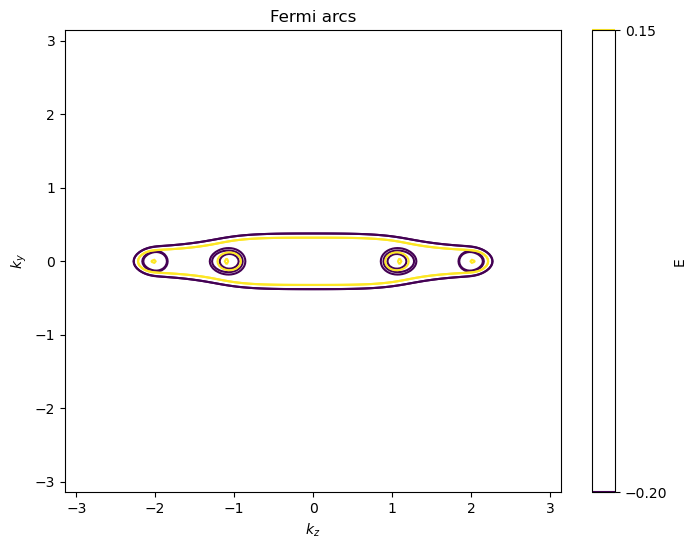

In [9]:
child_eigvals_oc_vs_kz = []
for kz in kzs:
    for ky in kys:
        #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
        HP_1 = np.sin(ky)*tau_y+(2+g1-np.cos(ky)-np.cos(kz))*tau_z
        VP_1 = (-1j/2)*tau_x+(1/2)*tau_z
        VP_1d = VP_1.conj().T
    
        #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
        HP_2 = np.sin(ky)*sigma_y-(2+g2-np.cos(ky)-np.cos(kz))*sigma_z
        VP_2 = (1j/2)*sigma_x-(1/2)*sigma_z
        VP_2d = VP_2.conj().T
    
        #H_c = H1⊗ H2
        h_onsite = np.kron (HP_1, HP_2)
        v_hops = np.kron (VP_1, VP_2)
        v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
        nearest = np.kron (HP_1, VP_2)+ np.kron(VP_1, HP_2)
        
        H_child = np.zeros((4*L, 4*L), dtype=complex)
        for i in range(L):
            H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger
            if i < L - 1:
                H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
                H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
            if i < L - 2:
                H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
                H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T
    
    
        eigenvals_oc_child = np.linalg.eigvalsh(H_child)
        child_eigvals_oc_vs_kz.append(eigenvals_oc_child.real)

arr = np.array(child_eigvals_oc_vs_kz)
arr_reshaped = arr.reshape(len(kzs), len(kys), 4*L)

#Plot
plt.figure(figsize=(8,6))
for band in range (4*L):
    plt.contour(ZZ, YY, arr_reshaped[:, :, band], [-0.2,0.15])
plt.colorbar(label=f'E' )
plt.xlabel('$k_z$')
plt.ylabel('$k_y$')
plt.title('Fermi arcs')
plt.show()